# Melate Info

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Read the file downloaded from the website: https://www.pronosticos.gob.mx/DatosAbiertos/NumerosGanadores
data = pd.read_csv("/Users/Gullermo R/Claro drive/Datasets/Melate/Melate.csv")

In [3]:
data.head()

,NPRODUCTO,CONCURSO,R1,R2,R3,R4,R5,R6,R7,BOLSA,FECHA
0,40,3620,13,20,39,43,54,56,42,293300000,31/07/2022
1,40,3619,1,3,11,28,41,49,53,289900000,29/07/2022
2,40,3618,5,17,19,46,48,50,55,286300000,27/07/2022
3,40,3617,2,3,26,49,50,52,29,283800000,24/07/2022
4,40,3616,13,15,30,37,40,45,31,280300000,22/07/2022


In [4]:
data.shape

(3620, 11)

In [5]:
# Melate ha incrementado en 4 ocasiones los números a seleccionar en sus sorteos:
# El último incremento, que se ha mantenido hasta la fecha, se dio en el sorteo 2088 (de 51 a 56 números).
# Pasó de una en 18,009,460 a una en 32,468,436 posibilidades. O sea, 80% más difícil.

# Subconjunto de filas a partir del sorteo 2008 (3620-2088 = 1532 + 1)
data56 = data[0:1533]

In [6]:
data56

,NPRODUCTO,CONCURSO,R1,R2,R3,R4,R5,R6,R7,BOLSA,FECHA
0,40,3620,13,20,39,43,54,56,42,293300000,31/07/2022
1,40,3619,1,3,11,28,41,49,53,289900000,29/07/2022
2,40,3618,5,17,19,46,48,50,55,286300000,27/07/2022
3,40,3617,2,3,26,49,50,52,29,283800000,24/07/2022
4,40,3616,13,15,30,37,40,45,31,280300000,22/07/2022
...,...,...,...,...,...,...,...,...,...,...,...
1528,40,2092,9,10,24,32,35,55,34,64000000,23/12/2007
1529,40,2091,7,8,26,27,53,56,20,57000000,19/12/2007
1530,40,2090,17,18,19,24,37,53,50,54000000,16/12/2007
1531,40,2089,10,17,21,50,54,56,37,50000000,12/12/2007


In [7]:
dataR = data56[["R1"]]

In [8]:
dataR.head()

,R1
0,13
1,1
2,5
3,2
4,13


In [9]:
for i in range(2,7):    
    column_name = "R" + str(i)
    print(column_name)
    dataTemp = data56[[column_name]]
    dataTemp1 = dataTemp.rename(columns={column_name:"R1"})
    dataR = pd.concat([dataR,dataTemp1], axis = 0)

dataR.shape

R2
R3
R4
R5
R6


(9198, 1)

In [10]:
dataR.head()

,R1
0,13
1,1
2,5
3,2
4,13


In [11]:
dataR.shape

(9198, 1)

Text(0.5, 1.0, 'Histograma del 1 al 56')

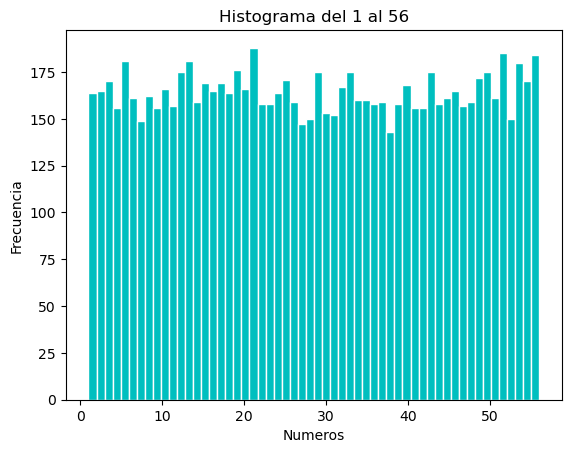

In [12]:
# Raffles histogram
plt.hist(dataR["R1"],bins=56,edgecolor="w", color="c")
plt.xlabel("Numeros")
plt.ylabel("Frecuencia")
plt.title("Histograma del 1 al 56")

In [13]:
grouped_numbers = dataR.groupby("R1")
grouped_numbers.size()

R1
1     164
2     165
3     170
4     156
5     181
6     161
7     149
8     162
9     156
10    166
11    157
12    175
13    181
14    159
15    169
16    165
17    169
18    164
19    176
20    166
21    188
22    158
23    158
24    164
25    171
26    159
27    147
28    150
29    175
30    153
31    152
32    167
33    175
34    160
35    160
36    158
37    159
38    143
39    158
40    168
41    156
42    156
43    175
44    158
45    161
46    165
47    157
48    159
49    172
50    175
51    161
52    185
53    150
54    180
55    170
56    184
dtype: int64

In [14]:
dataR['Freq'] = dataR.groupby('R1')["R1"].transform('count')

In [15]:
dataR.head

<bound method NDFrame.head of       R1  Freq
0     13   181
1      1   164
2      5   181
3      2   165
4     13   181
...   ..   ...
1528  55   170
1529  56   184
1530  53   150
1531  56   184
1532  51   161

[9198 rows x 2 columns]>

In [16]:
dataR.shape

(9198, 2)

In [17]:
# sorting by R1 numbers
dataR.sort_values("R1", inplace = True)

In [18]:
# dropping ALL duplicate values
df = dataR.drop_duplicates()

In [19]:
df.shape

(56, 2)

In [20]:
df.head(56)

,R1,Freq
840,1,164
736,2,165
509,3,170
938,4,156
768,5,181
652,6,161
1111,7,149
357,8,162
774,9,156
443,10,166


In [21]:
df = df.sort_index(ascending=True)
df.reset_index(inplace = True, drop=True)

In [22]:
df.head(56)

,R1,Freq
0,50,175
1,37,159
2,18,164
3,26,159
4,22,158
5,42,156
6,15,169
7,27,147
8,56,184
9,52,185


In [23]:
# sorting by R1 numbers
df.sort_values("R1", inplace = True)

In [24]:
df.head(56)

,R1,Freq
36,1,164
31,2,165
24,3,170
44,4,156
33,5,181
28,6,161
48,7,149
14,8,162
35,9,156
19,10,166


In [25]:
df.describe()

,R1,Freq
count,56.000000,56.000000
mean,28.500000,164.250000
std,16.309506,10.069305
min,1.000000,143.000000
25%,14.750000,158.000000
50%,28.500000,163.000000
75%,42.250000,170.250000
max,56.000000,188.000000


In [26]:
#save as csv (Don't forget to add '.csv' at the end of the path)
MelateStats = df.to_csv(r'/Users/Gullermo R/Claro drive/Datasets/Melate/MelateStats.csv', header=True) 

In [27]:
# Standard Library Imports for pandas_profiling 
from pathlib import Path

# Installed packages
#import pandas as pd
from ipywidgets import widgets

#print(pd.__version__)

# Our package pandas_profiling
# from pandas_profiling import ProfileReport
# from pandas_profiling.utils.cache import cache_file

ModuleNotFoundError: No module named 'pandas_profiling'

In [ ]:
# Generate the Profiling Report
#profile = ProfileReport(
#    dataR, title="Melate", html={"style": {"full_width": True}}, sort=None
# )

In [ ]:
# profile